In [1]:
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import math

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2

In [3]:
data = pd.read_csv('data_svod.csv')
data = data.set_index('reg')
time_data = pd.DataFrame(columns = ['val'])
time_data['val'] = data.iloc[1233]
data_d = pd.DataFrame(columns = ['time'])
data_d['time'] = pd.to_datetime(time_data.index.to_frame(index=False)[0], format='%Y-%m-%d %H:%M:%S')
time_data = time_data.set_index(pd.DatetimeIndex(data_d['time']))
pi = math.pi
time_data.head()

,val
time,
2016-05-01 00:00:00,329
2016-05-01 01:00:00,171
2016-05-01 02:00:00,82
2016-05-01 03:00:00,54
2016-05-01 04:00:00,28


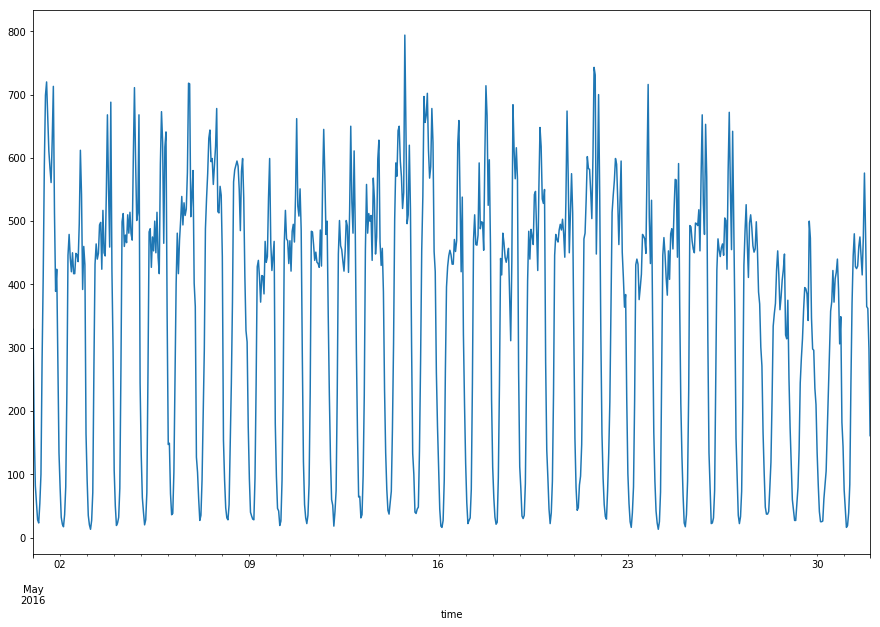

In [4]:
#график исходных данных
fig, axis = plt.subplots(figsize = (15,10))
time_data.val.plot()

Критерий Дики-Фуллера: p=0.001931


<Figure size 1080x504 with 0 Axes>

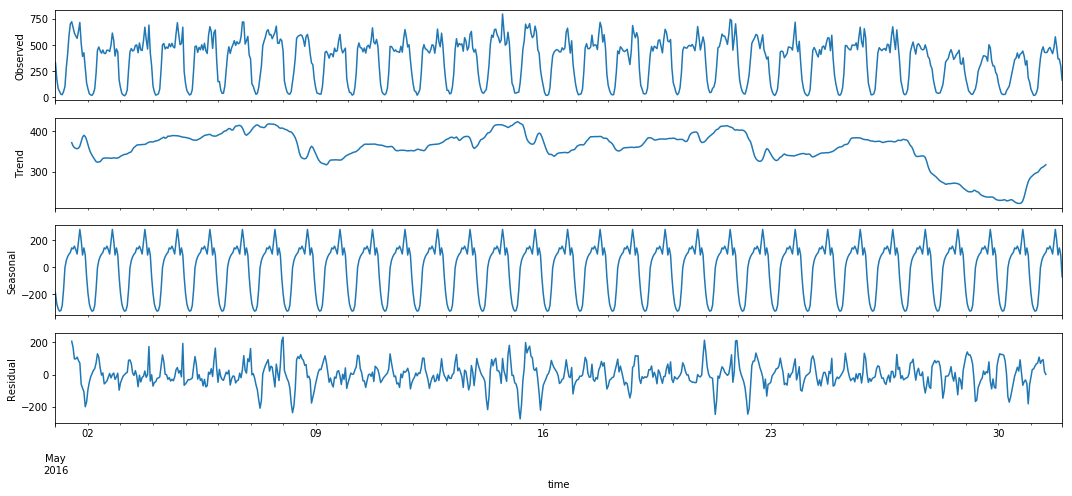

In [5]:
# декомпозиция по сезонным и трендовым составляющим
plt.figure(figsize(15,7))
sm.tsa.seasonal_decompose(time_data.val).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(time_data.val)[1])

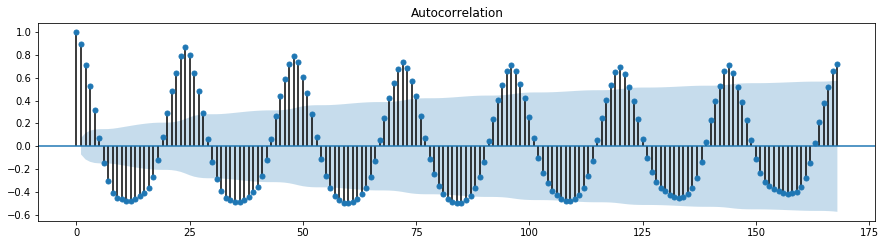

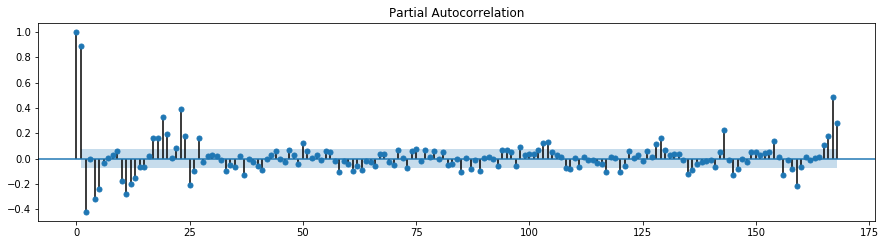

In [6]:
#коррелограммы
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(time_data.val.squeeze(), lags=168, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(time_data.val.values.squeeze(), lags=168, ax=ax)
pylab.show()

Критерий Дики-Фуллера: p=0.000000


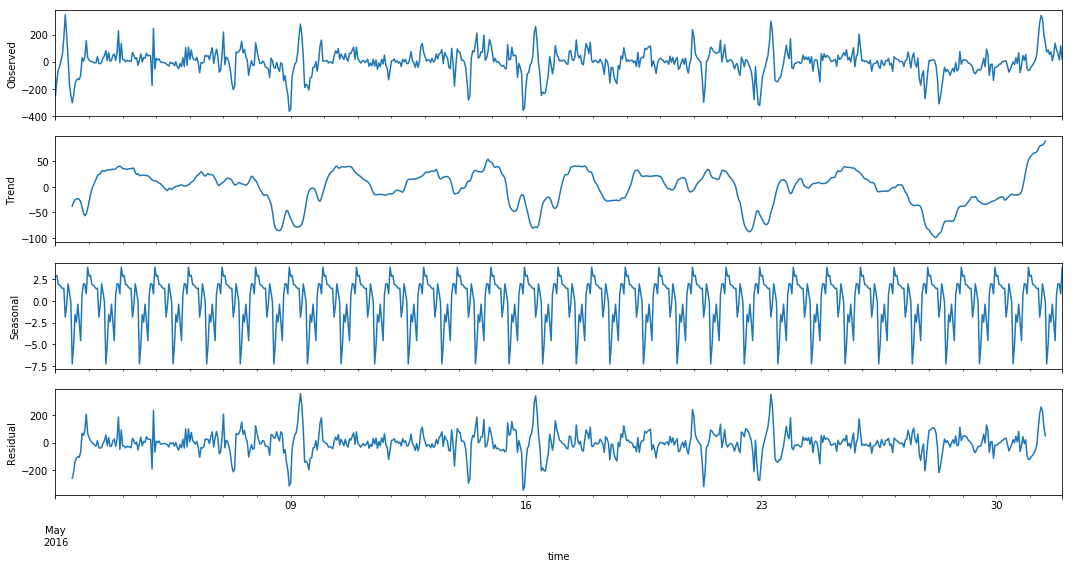

In [8]:
time_data['val_diff'] = time_data.val - time_data.val.shift(24)

sm.tsa.seasonal_decompose(time_data.val_diff[24:]).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(time_data.val_diff[24:])[1])

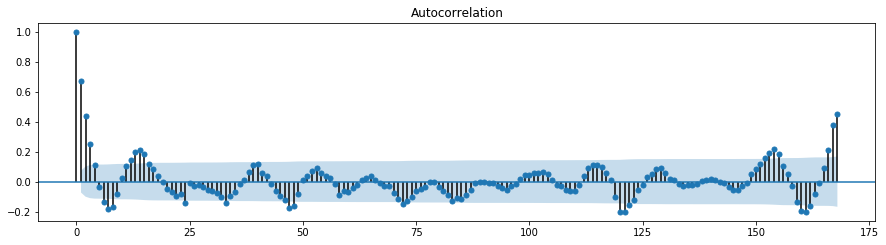

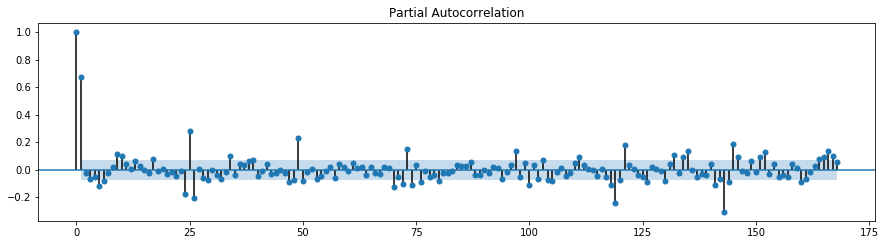

In [9]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(time_data.val_diff[24:].squeeze(), lags=168, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(time_data.val_diff[24:].values.squeeze(), lags=168, ax=ax)
pylab.show()

Критерий Дики-Фуллера: p=0.000000


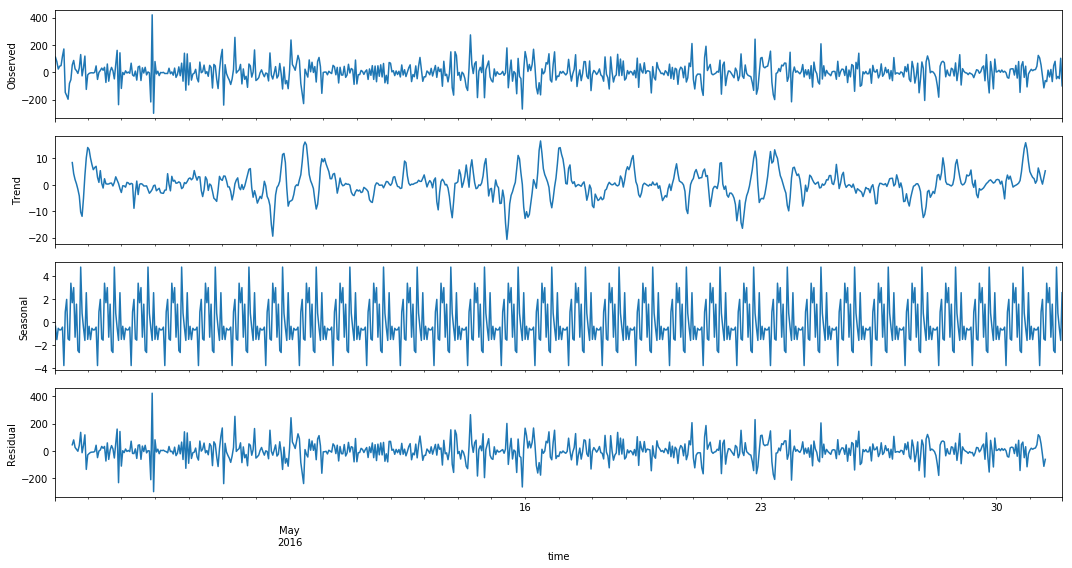

In [10]:
time_data['val_diff1'] = time_data.val_diff - time_data.val_diff.shift(1)

sm.tsa.seasonal_decompose(time_data.val_diff1[25:]).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(time_data.val_diff1[25:])[1])

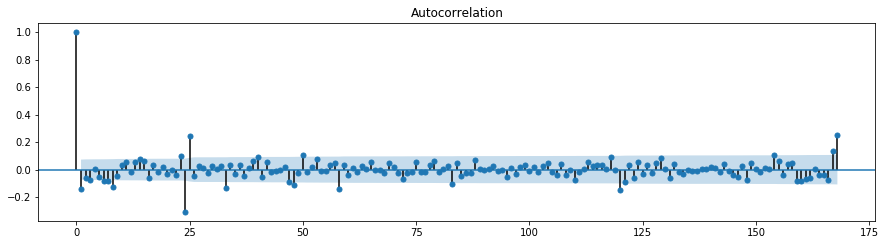

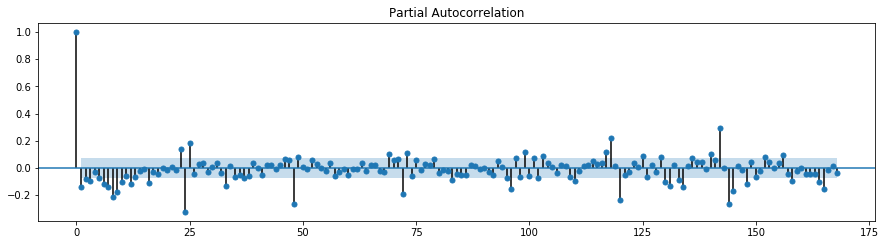

In [11]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(time_data.val_diff1[25:].squeeze(), lags=168, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(time_data.val_diff1[25:].values.squeeze(), lags=168, ax=ax)
pylab.show()

In [27]:
# Генерация фич
x = np.arange(1,745,1)

time_data['holiday'] = 0
time_data['pre_up_holiday'] = 0
time_data['weekend'] = 0
time_data['holiday'].iloc[time_data.index.day==30] = 1
time_data['holiday'].iloc[time_data.index.day==29] = 1
time_data['holiday'].iloc[time_data.index.day==28] = 1
time_data['pre_up_holiday'].iloc[time_data.index.day==29] = 1
time_data['pre_up_holiday'].iloc[time_data.index.day==28] = 1
time_data['week_day'] = time_data.index.dayofweek
time_data['weekend'].iloc[time_data.index.dayofweek==6]=1
time_data['weekend'].iloc[time_data.index.dayofweek==5]=1


time_data['n'] = x
time_data['s1'] = np.sin(x*1*pi/168)
time_data['s2'] = np.sin(x*2*pi/168)
time_data['s3'] = np.sin(x*3*pi/168)
time_data['s4'] = np.sin(x*4*pi/168)
time_data['s5'] = np.sin(time_data.index.dayofweek)




time_data['c1'] = np.cos(x*1*pi/168)
time_data['c2'] = np.cos(x*2*pi/168)
time_data['c3'] = np.cos(x*3*pi/168)
time_data['c4'] = np.cos(x*4*pi/168)
time_data['c5'] = np.cos(time_data.index.dayofweek)


C:\Users\Serge\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Serge\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Serge\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\User

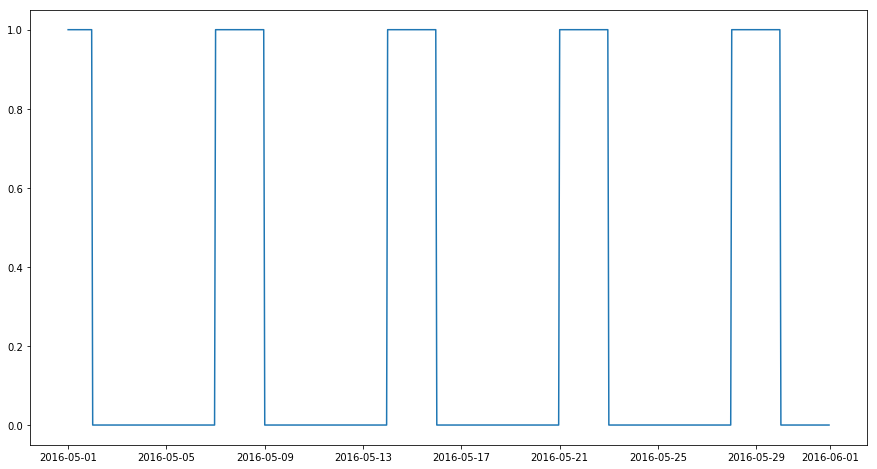

In [31]:
plot(time_data.weekend)

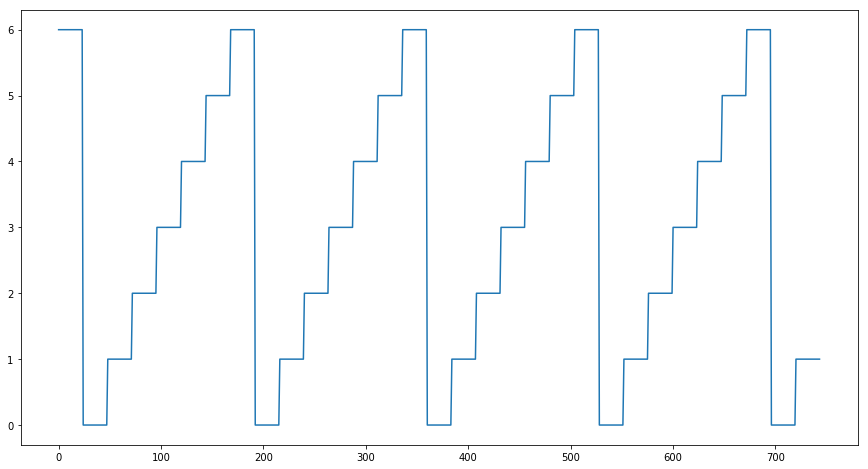

In [23]:
plot(time_data.index.dayofweek)

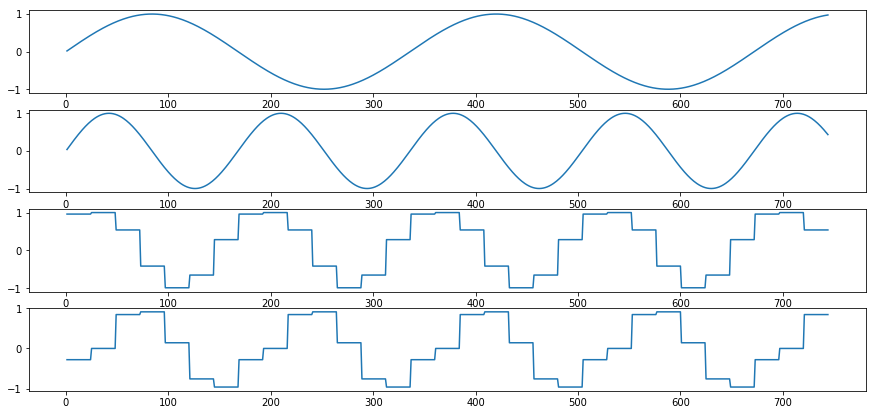

In [14]:
fig, axes = plt.subplots(nrows = 4,figsize=(15,7))
axes[0].plot(time_data['n'], time_data['s1'])
axes[1].plot(time_data['n'], time_data['s2'])
axes[2].plot(time_data['n'], time_data['c5'])
axes[3].plot(time_data['n'], time_data['s5'])

In [15]:
m1 = smf.ols('val_diff1 ~ s1 + s2 + s3 + s4 + c1 + c2 +'\
                    'c3 + c4 + n + holiday + pre_up_holiday', 
             data=time_data)
fitted = m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:              val_diff1   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                   0.05331
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               1.00
Time:                        20:33:35   Log-Likelihood:                -4109.5
No. Observations:                 719   AIC:                             8243.
Df Residuals:                     707   BIC:                             8298.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.2856      6.343      0.

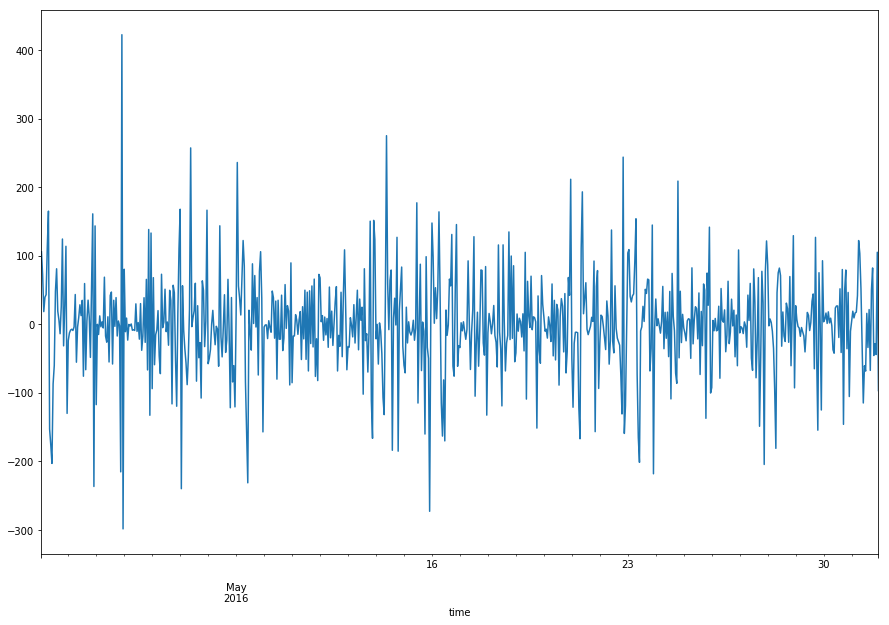

In [16]:
fig, axis = plt.subplots(figsize = (15,10))
fitted.resid.plot()

Критерий Дики-Фуллера: p=0.000000


<Figure size 1080x504 with 0 Axes>

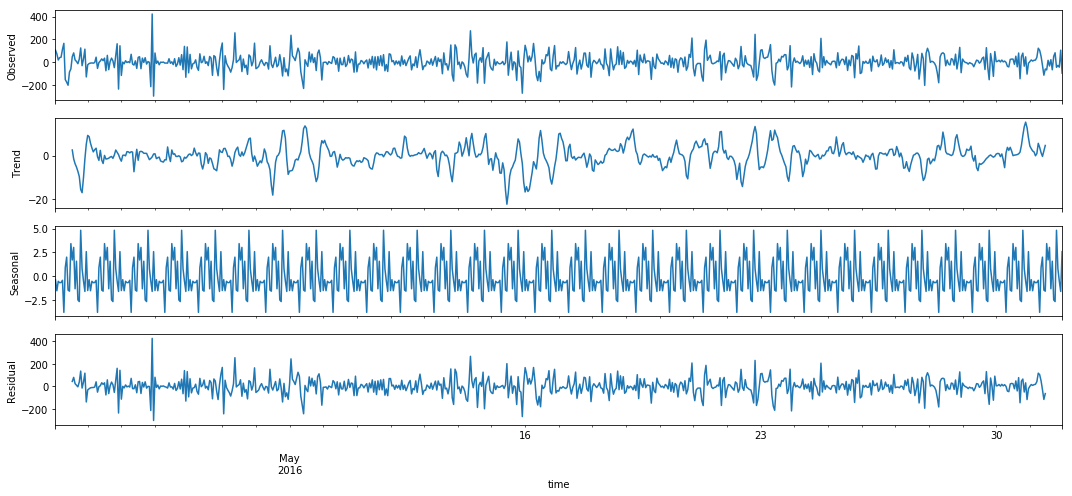

In [17]:
plt.figure(figsize(15,7))
sm.tsa.seasonal_decompose(fitted.resid).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(fitted.resid)[1])

In [18]:
a = pd.DataFrame()
a['res']=fitted.resid - fitted.resid.shift(168)

Критерий Дики-Фуллера: p=0.000000


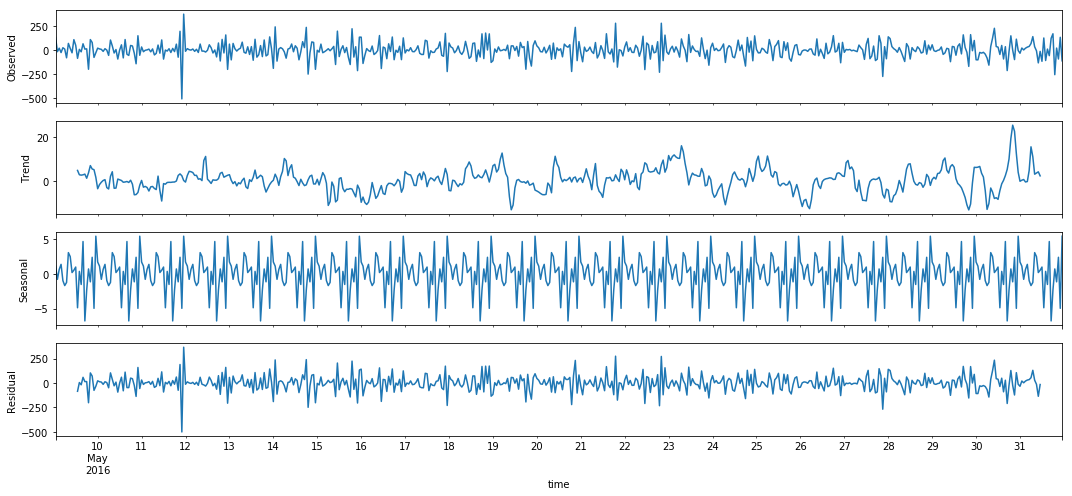

In [19]:
sm.tsa.seasonal_decompose(a.res[168:]).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(a.res[168:])[1])

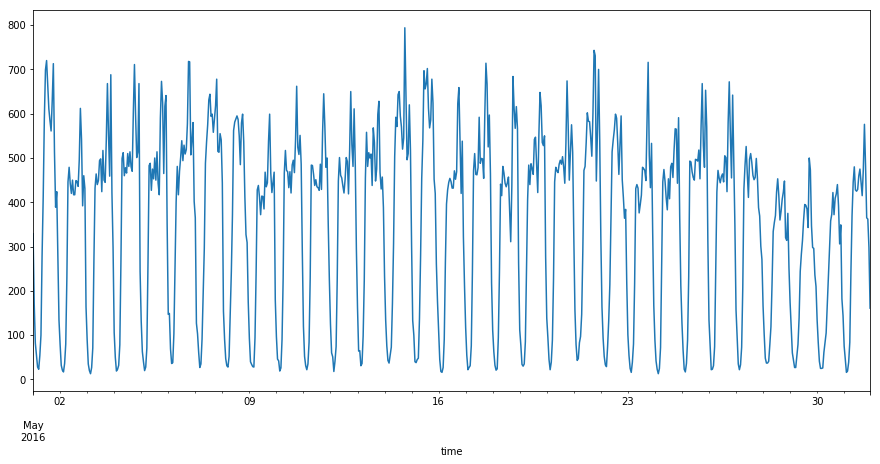

In [20]:
time_data.val.plot()

In [32]:
exog = time_data[['s1','s2','s3','s4','c1','c2','c3','c4','n','holiday','pre_up_holiday', 's5', 'c5', 'week_day', 'weekend']]

In [22]:
ps = range(0, 2) #было о т0 до 5
d=1
qs = range(0, 2) #было о т0 до 4
Ps = range(0, 2) #было о т0 до 5
D=1
Qs = range(0, 2)

from itertools import product

parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

16

In [23]:
from tqdm import tqdm

In [24]:
#расчет оптимальных параметров модели
'''
%%time
results = []
best_aic = float("inf")

for param in tqdm(parameters_list):
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model = sm.tsa.statespace.SARIMAX(time_data.val, 
                                        exog=exog, order=(param[0], d, param[1]),seasonal_order=(param[2], D, param[3], 24*7)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

warnings.filterwarnings('default')

result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
'''

'\n%%time\nresults = []\nbest_aic = float("inf")\n\nfor param in tqdm(parameters_list):\n    #try except нужен, потому что на некоторых наборах параметров модель не обучается\n    try:\n        model = sm.tsa.statespace.SARIMAX(time_data.val, \n                                        exog=exog, order=(param[0], d, param[1]),seasonal_order=(param[2], D, param[3], 24*7)).fit(disp=-1)\n    except ValueError:\n        print(\'wrong parameters:\', param)\n        continue\n    aic = model.aic\n    #сохраняем лучшую модель, aic, параметры\n    if aic < best_aic:\n        best_model = model\n        best_aic = aic\n        best_param = param\n    results.append([param, model.aic])\n\nwarnings.filterwarnings(\'default\')\n\nresult_table = pd.DataFrame(results)\nresult_table.columns = [\'parameters\', \'aic\']\nprint(result_table.sort_values(by = \'aic\', ascending=True).head())\n'

In [33]:
model = sm.tsa.statespace.SARIMAX(time_data.val, 
                                        exog=exog, order=(1, 0, 1),seasonal_order=(1, 1, 0, 24)).fit(disp=-1)

C:\Users\Serge\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Serge\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [34]:
print(model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                val   No. Observations:                  744
Model:             SARIMAX(1, 0, 1)x(1, 1, 0, 24)   Log Likelihood               -4007.150
Date:                            Wed, 22 Jan 2020   AIC                           8052.300
Time:                                    22:47:09   BIC                           8139.306
Sample:                                05-01-2016   HQIC                          8085.889
                                     - 05-31-2016                                         
Covariance Type:                              opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
s1                 1.9986     14.874      0.134      0.893     -27.154      31.151
s2               -37.45

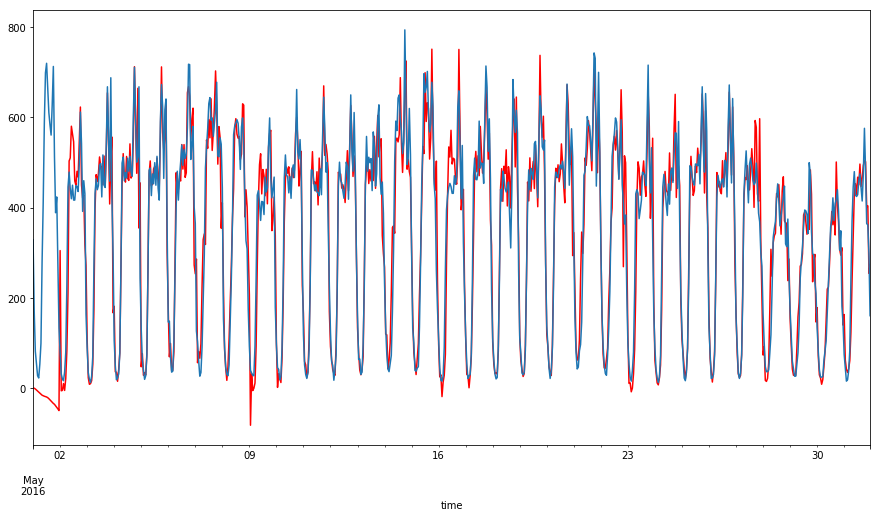

In [35]:
model.fittedvalues.plot(color='r')
time_data.val.plot()

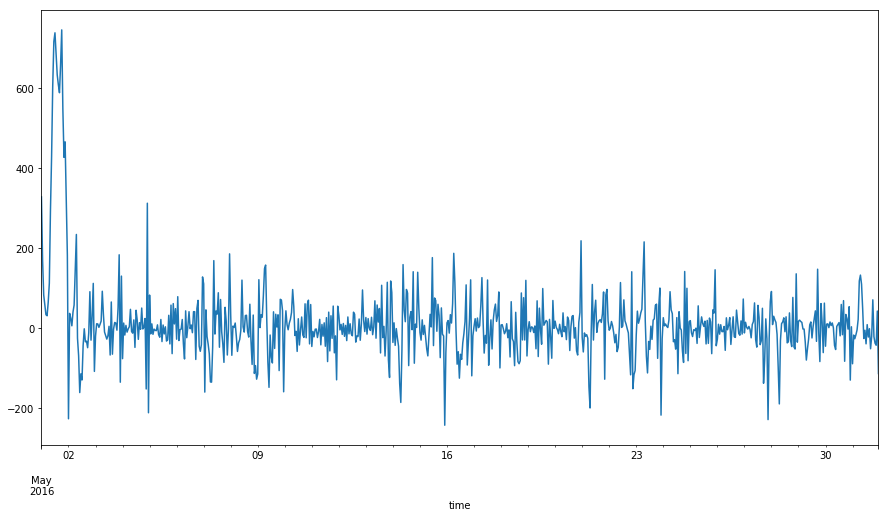

In [36]:
model.resid.plot()

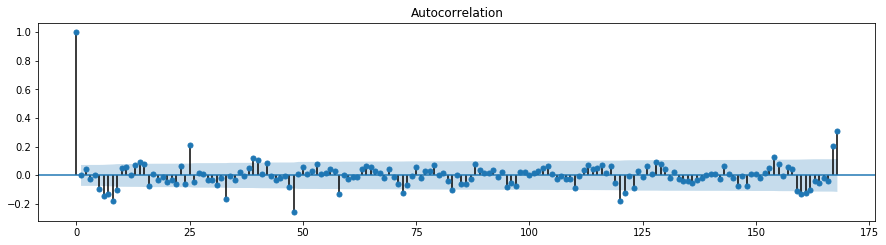

In [37]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(model.resid[24:].squeeze(), lags=168, ax=ax)
pylab.show()